# Unsupervised Learning: Trade&Ahead

**Marks: 60**

## Problem Statement

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

The key questions that need to be answered are:

* How many different types (clusters/segments) of stocks can be found from the data?
* How do these different groups of securities differ from each other?
* Do you get slightly different solutions from two different techniques? How would you explain the difference?

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
import os
from google.colab import drive
drive.mount("/content/drive")
os.chdir("drive/My Drive/PGP-DSBA")

## Complete the code to import the data
data = pd.read_csv('stock_data.csv')

Mounted at /content/drive


## Overview of the Dataset

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [ ]:
# checking shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.") ## Complete the code to get the shape of data

There are 340 rows and 15 columns.


### Displaying few rows of the dataset

In [ ]:
# Displaying a 10 rows sample of the data
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


### Checking the data types of the columns for the dataset

In [ ]:
# checking the column names and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [ ]:
# checking for duplicate values
data.duplicated().sum()

0

* There is no duplicate data or missing values in the given data set
* Columns with Object data types - Ticker Symbol, Security, GICS Sector, GICS Sub Industry. These should be converted to dtypy category.
* Rest all are numerical columns

### Creating a copy of original data

In [ ]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

### Checking for duplicates and missing values

In [ ]:
# checking for missing values in the data
df.isna().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

There is no duplicate row in the given data set

### Statistical summary of the dataset

**Let's check the statistical summary of the data.**

In [ ]:
# convert all columns with dtype object into category
for col in df.columns[df.dtypes=='object']:
    df[col] = df[col].astype('category')

In [ ]:
# dropping the ticker symbol column, as it does not provide any information
df.drop("Ticker Symbol", axis=1, inplace=True)

In [ ]:
# Checking data info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Security                      340 non-null    category
 1   GICS Sector                   340 non-null    category
 2   GICS Sub Industry             340 non-null    category
 3   Current Price                 340 non-null    float64 
 4   Price Change                  340 non-null    float64 
 5   Volatility                    340 non-null    float64 
 6   ROE                           340 non-null    int64   
 7   Cash Ratio                    340 non-null    int64   
 8   Net Cash Flow                 340 non-null    int64   
 9   Net Income                    340 non-null    int64   
 10  Earnings Per Share            340 non-null    float64 
 11  Estimated Shares Outstanding  340 non-null    float64 
 12  P/E Ratio                     340 non-null    floa

The 14 columns have three different dtypes: category(3), float64(7), int64(4)

In [ ]:
#Saving the numerical columns in a list for future use
num_col = df.select_dtypes(include=np.number).columns.tolist()
num_col

['Current Price',
 'Price Change',
 'Volatility',
 'ROE',
 'Cash Ratio',
 'Net Cash Flow',
 'Net Income',
 'Earnings Per Share',
 'Estimated Shares Outstanding',
 'P/E Ratio',
 'P/B Ratio']

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Price,340.0,8.086234e+01,9.805509e+01,4.500000e+00,3.855500e+01,5.970500e+01,9.288000e+01,1.274950e+03
Price Change,340.0,4.078194e+00,1.200634e+01,-4.712969e+01,-9.394838e-01,4.819505e+00,1.069549e+01,5.505168e+01
Volatility,340.0,1.525976e+00,5.917984e-01,7.331632e-01,1.134878e+00,1.385593e+00,1.695549e+00,4.580042e+00
ROE,340.0,3.959706e+01,9.654754e+01,1.000000e+00,9.750000e+00,1.500000e+01,2.700000e+01,9.170000e+02
Cash Ratio,340.0,7.002353e+01,9.042133e+01,0.000000e+00,1.800000e+01,4.700000e+01,9.900000e+01,9.580000e+02
Net Cash Flow,340.0,5.553762e+07,1.946365e+09,-1.120800e+10,-1.939065e+08,2.098000e+06,1.698108e+08,2.076400e+10
Net Income,340.0,1.494385e+09,3.940150e+09,-2.352800e+10,3.523012e+08,7.073360e+08,1.899000e+09,2.444200e+10
Earnings Per Share,340.0,2.776662e+00,6.587779e+00,-6.120000e+01,1.557500e+00,2.895000e+00,4.620000e+00,5.009000e+01
Estimated Shares Outstanding,340.0,5.770283e+08,8.458496e+08,2.767216e+07,1.588482e+08,3.096751e+08,5.731175e+08,6.159292e+09
P/E Ratio,340.0,3.261256e+01,4.434873e+01,2.935451e+00,1.504465e+01,2.081988e+01,3.176476e+01,5.280391e+02


In [ ]:
df.describe(include='category').T

,count,unique,top,freq
Security,340,340,3M Company,1
GICS Sector,340,11,Industrials,53
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16


## Exploratory Data Analysis

### Univariate analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**`Current Price`**

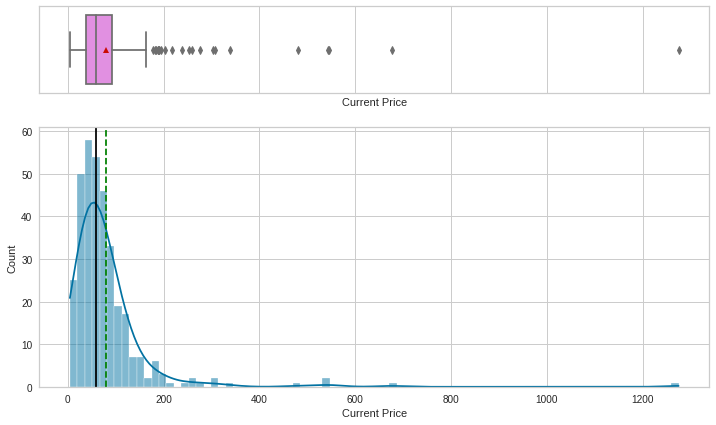

In [ ]:
histogram_boxplot(df, 'Current Price', kde = True)

* The distribution is heavily right skewed with few outliers at positive side and all price above 0 .

**`Price Change`**

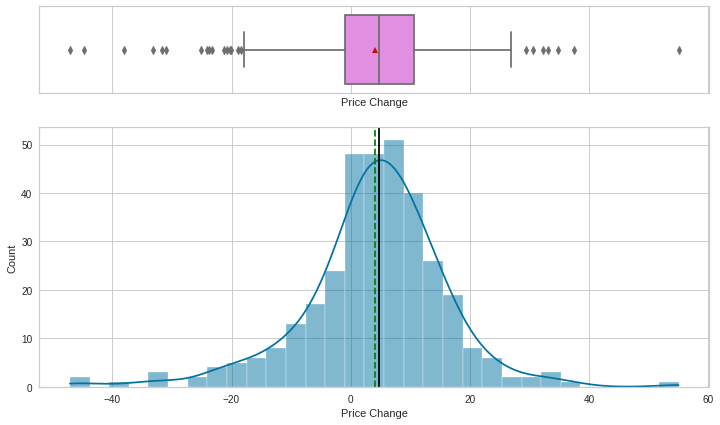

In [ ]:
histogram_boxplot(df,'Price Change', kde=True)  

* The distribution for Price Change is almost normal with few outliers at positive and negative sides.

**`Volatility`**

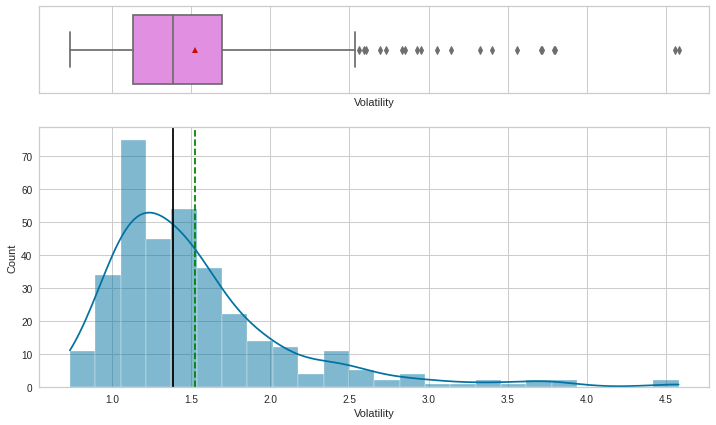

In [ ]:
histogram_boxplot(df, 'Volatility', kde = True) 

* Volatility has right skewed distribution with positive outliers.

**`ROE`**

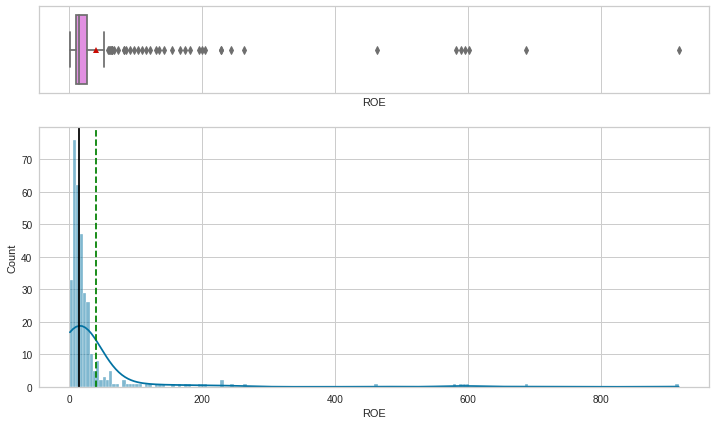

In [ ]:
histogram_boxplot(df, 'ROE', kde=True) 

* ROE data is right skewed with many positive outliers.

**`Cash Ratio`**

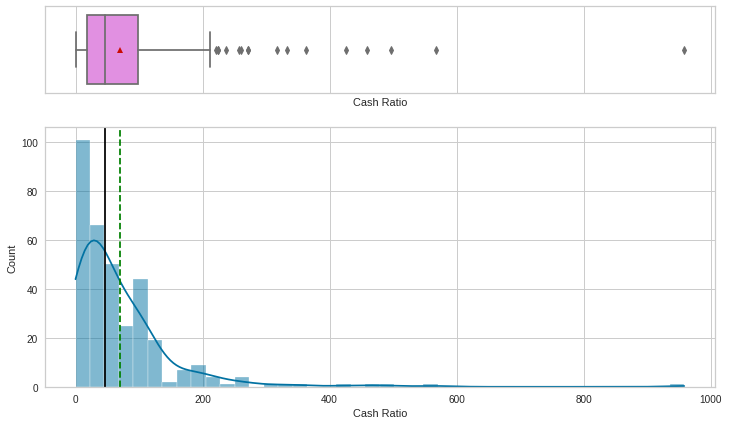

In [ ]:
histogram_boxplot(df, 'Cash Ratio', kde=True)

* Distribution for Cash Ratio is right skewed with several outliers at positive side.

**`Net Cash Flow`**

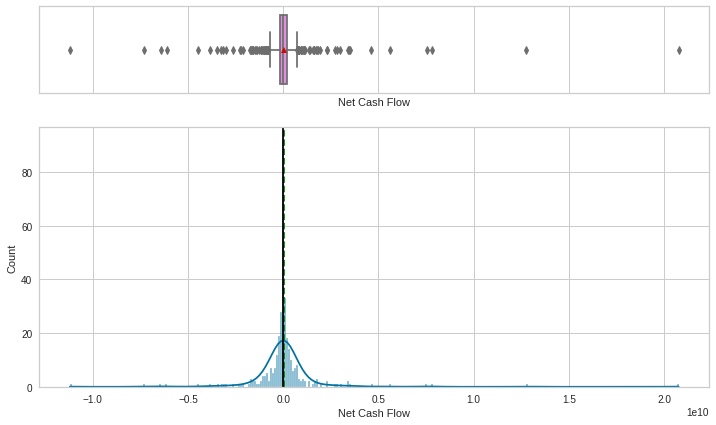

In [ ]:
histogram_boxplot(df, 'Net Cash Flow', kde=True) 

* Net Cash Flow has normal distributio with many outliers at both positive and negative side

**`Net Income`**

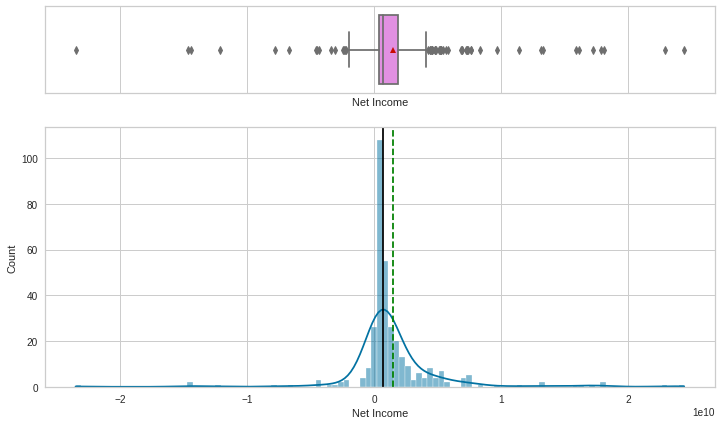

In [ ]:
histogram_boxplot(df, 'Net Income',kde=True)  

* Distribution for Net Income is almost normal with several outliers at both sides.

**`Earnings Per Share`**

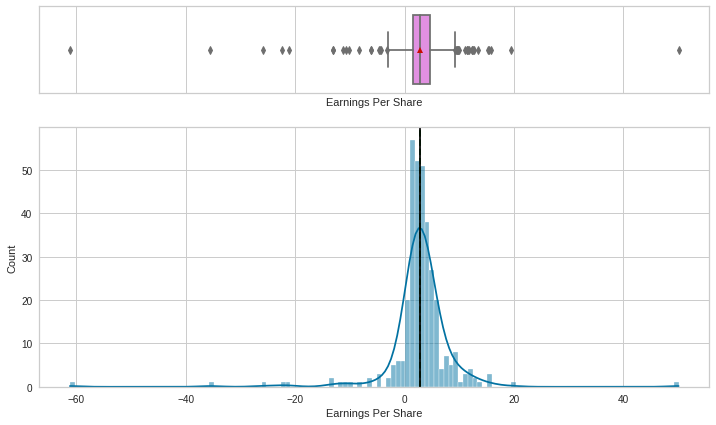

In [ ]:
histogram_boxplot(df,'Earnings Per Share',kde=True)

* Distribution is normal with several outliers at both sides.


**`Estimated Shares Outstanding`**

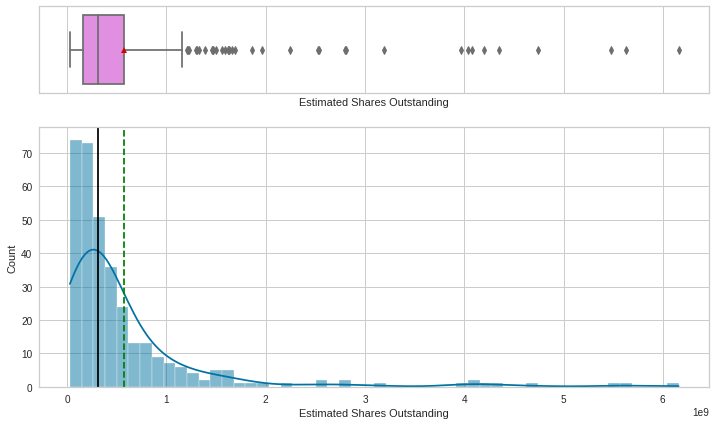

In [ ]:
histogram_boxplot(df,'Estimated Shares Outstanding',kde=True) 

* Data for Estimated Shares Outstanding is heavily right skewed with several outliers at positive sides.

**`P/E Ratio`**

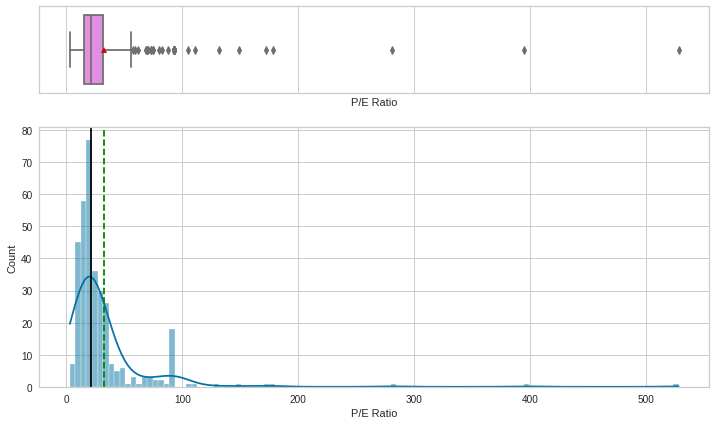

In [ ]:
histogram_boxplot(df,'P/E Ratio',kde=True) 

* Distribution of P/E Ratio is heavily right skewed with several outliers at positive sides.

**`P/B Ratio`**

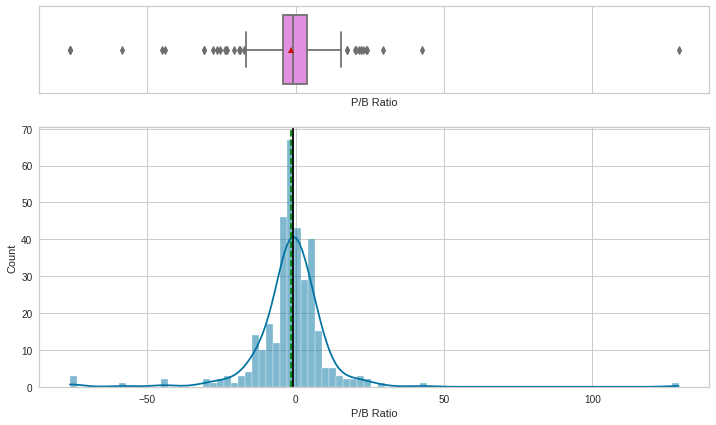

In [ ]:
histogram_boxplot(df, 'P/B Ratio',kde=True)

* Distribution of P/B Ratio is normal with outliers at both positive and negative sides.

In [ ]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`GICS Sector`**

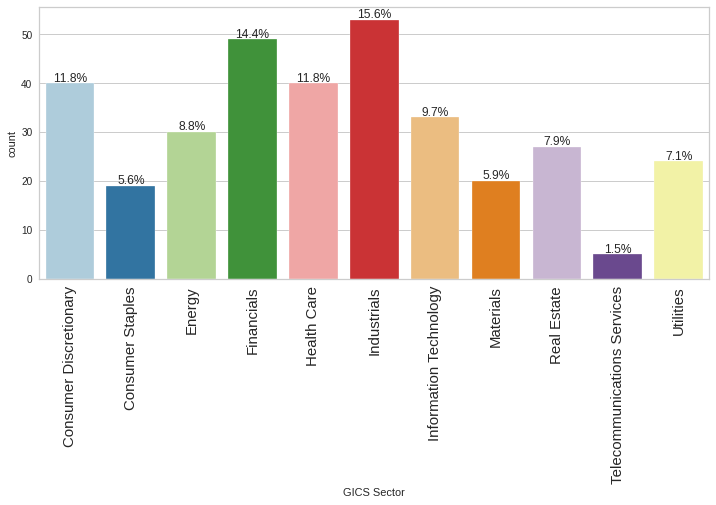

In [ ]:
labeled_barplot(df, 'GICS Sector', perc=True)

In [ ]:
df['GICS Sector'].value_counts().head(n=5)

Industrials               53
Financials                49
Consumer Discretionary    40
Health Care               40
Information Technology    33
Name: GICS Sector, dtype: int64

* There are 11 different sectors accross 340 observations. 
* Top 5 sectors are - Industrials, Financials, Consumer Discretinary, Health Care and IT.
* Lowest is TeleCom services with only 1.5% of total sectors.


**`GICS Sub Industry`**

In [ ]:

pd.crosstab(df['GICS Sub Industry'], df['GICS Sector']).style.highlight_max(
    color="lightgreen", axis=0
) 

GICS Sector,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Telecommunications Services,Utilities
GICS Sub Industry,,,,,,,,,,,
Advertising,2,0,0,0,0,0,0,0,0,0,0
Aerospace & Defense,0,0,0,0,0,4,0,0,0,0,0
Agricultural Products,0,1,0,0,0,0,0,0,0,0,0
Air Freight & Logistics,0,0,0,0,0,3,0,0,0,0,0
Airlines,0,0,0,0,0,5,0,0,0,0,0
Alternative Carriers,0,0,0,0,0,0,0,0,0,1,0
"Apparel, Accessories & Luxury Goods",1,0,0,0,0,0,0,0,0,0,0
Application Software,0,0,0,0,0,0,2,0,0,0,0
Asset Management & Custody Banks,0,0,0,4,0,0,0,0,0,0,0


In [ ]:
df['GICS Sub Industry'].value_counts().head(n=5)

Oil & Gas Exploration & Production    16
REITs                                 14
Industrial Conglomerates              14
Internet Software & Services          12
Electric Utilities                    12
Name: GICS Sub Industry, dtype: int64

* Majority of the securities - 16 nos, belongs to Oil & Gas Exploration & Production  under GIS Sector - Energy.
* GICS Sub Industry - Industrial ConglomeratesIndustrial Conglomerates ( Sector - Industrials) & REITs (Sector - Real Estate) both have 14 securities. 
* Internet Software & Services & Electric Utilities are in 3rd place with 12 securities.

### Bivariate Analysis

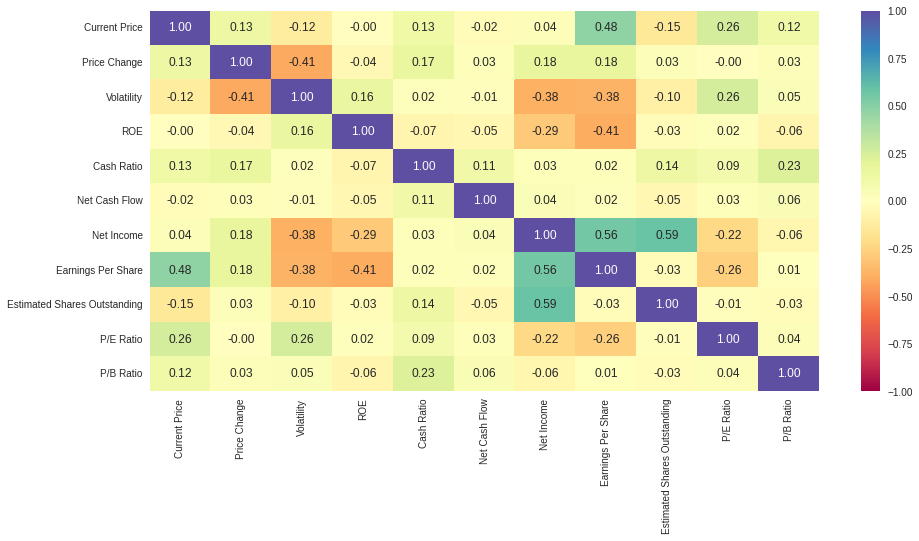

In [ ]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* Volatility is negatively corelated with Price Change, Earning Per Share and Net Income. So, this basically means if a stock becomes more volatile, most likely it's price will drop and alo, if company's net income and Earning per share is more, it's stock is less volatile.
* Earning per share is positively correlated with Net Income and Current Price. This means if Earning Per share increases, company's net income and stock price both are more likely to increase.
* Net Income is also positively correlated with Estimated Shares Outstanding.

* Earning Per Share is also negatively correlated with ROE. Earing Per Share is less if company's (net income/shareholders' equity) is more.


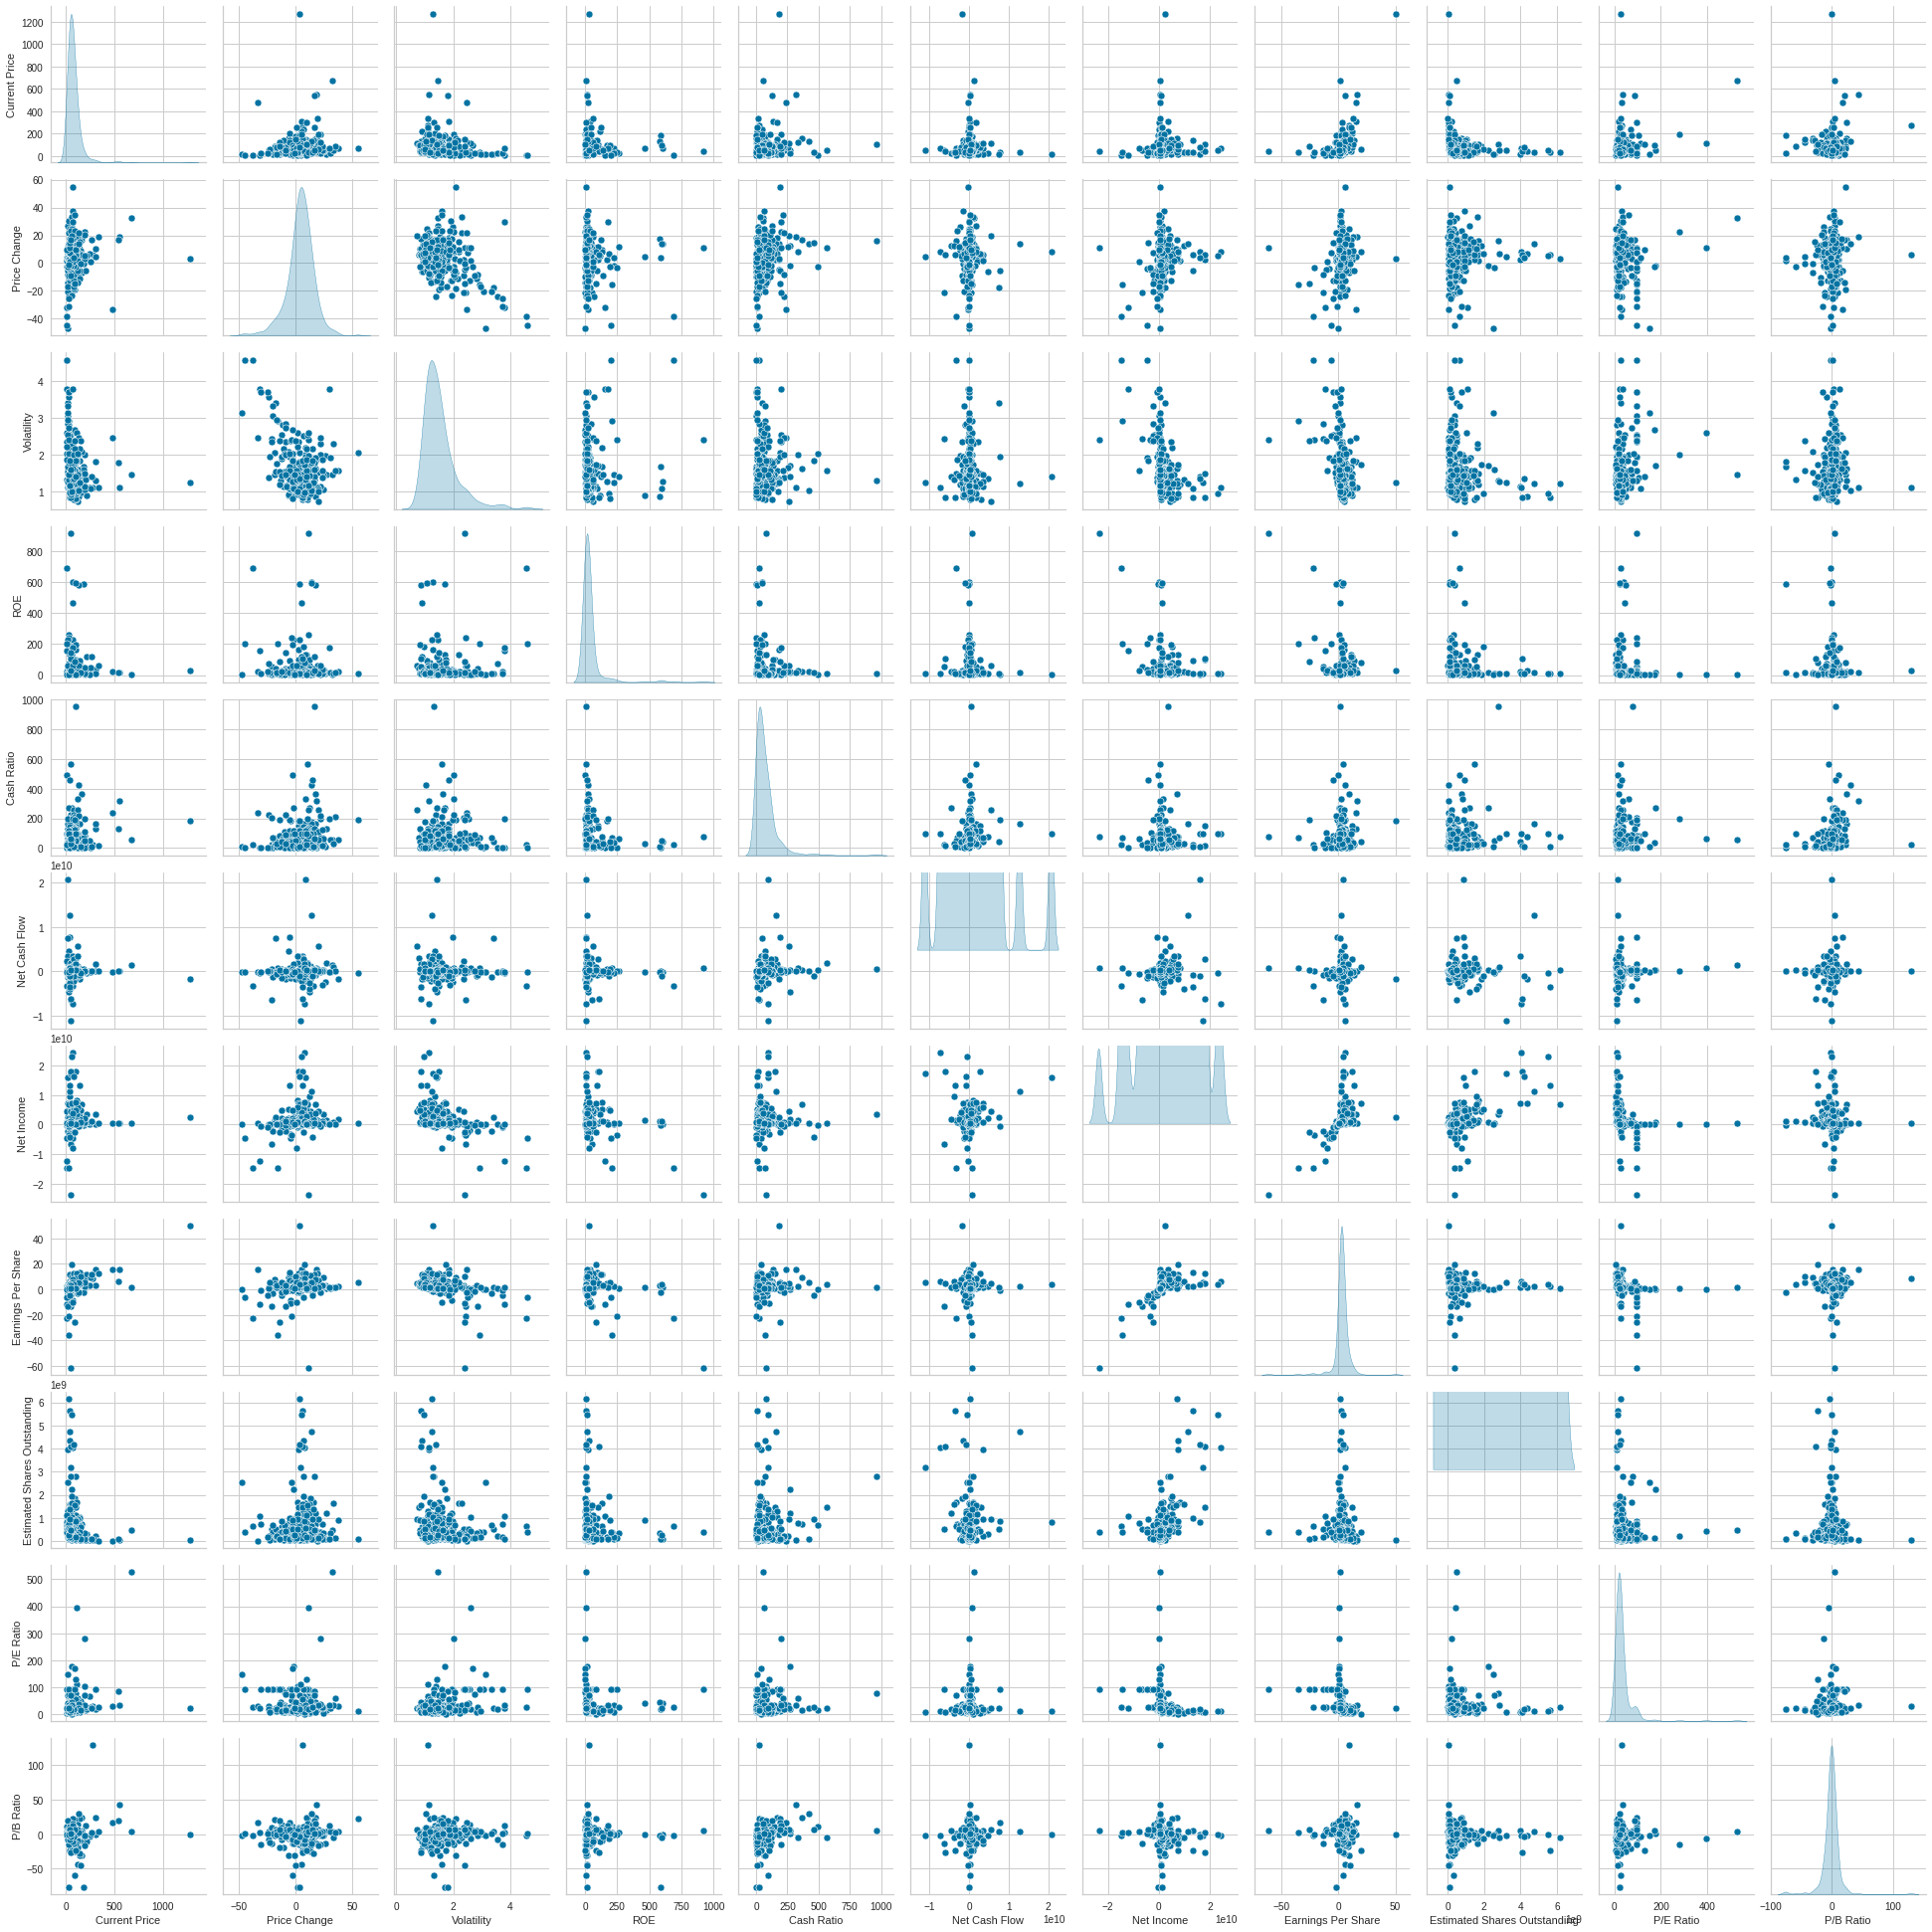

In [ ]:
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

**Let's check the stocks of which economic sector have seen the maximum price increase on average.**

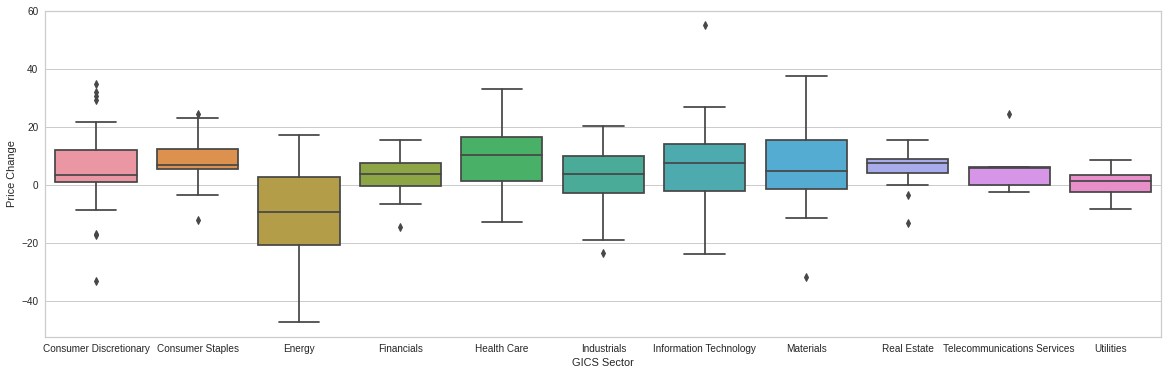

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(data = df, x='GICS Sector', y='Price Change')  
plt.show()

* We observe from the above plot that Healthcare and Information Technology have maximum number of securities with very positive price change making them more favorable stocks.
* Real Estate has the least variation in price change whereas it seems that Energy sector has the maximum variation.

**Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. Let's see how the average cash ratio varies across economic sectors.**

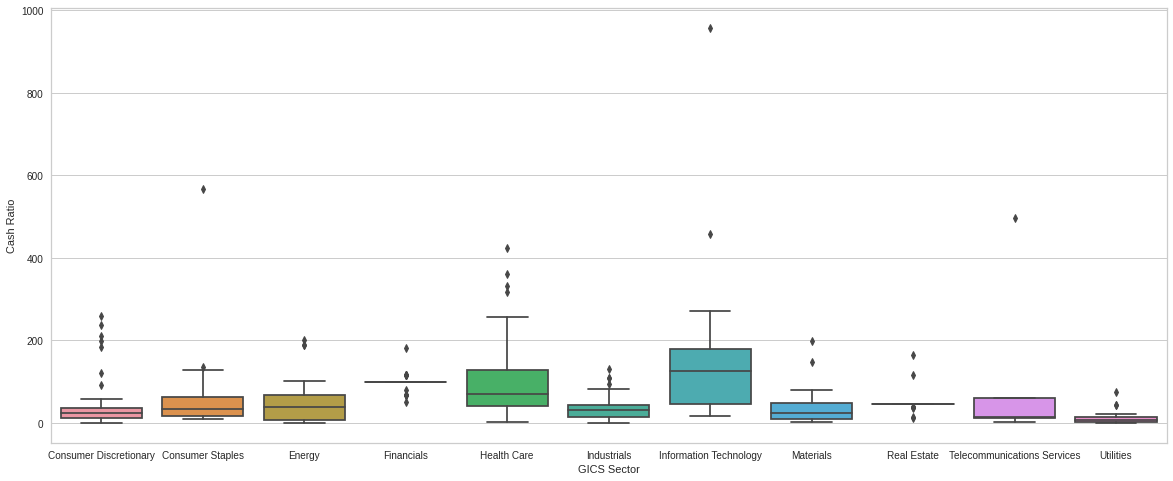

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df, y='Cash Ratio', x='GICS Sector') 
plt.show()

In [ ]:
df.groupby('GICS Sector')['Cash Ratio'].mean().sort_values(ascending=False)

GICS Sector
Information Technology         149.818182
Telecommunications Services    117.000000
Health Care                    103.775000
Financials                      98.591837
Consumer Staples                70.947368
Energy                          51.133333
Real Estate                     50.111111
Consumer Discretionary          49.575000
Materials                       41.700000
Industrials                     36.188679
Utilities                       13.625000
Name: Cash Ratio, dtype: float64

* We observe that Information technology and Telecomm have highest cash ratio across the different securities than others.
* Utilities sector has very low cash ratio.
* Information technology and Health care have high variance whereas Finance and Real Estate are with low variance.

**P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. Let's see how the P/E ratio varies, on average, across economic sectors.**

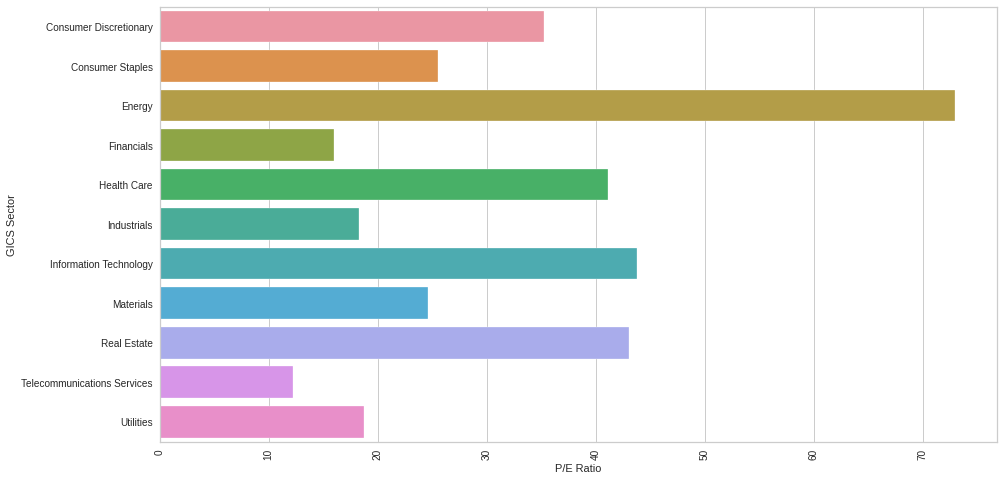

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='P/E Ratio', y='GICS Sector', ci=False)  
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby('GICS Sector')['P/E Ratio'].mean().sort_values(ascending=False)

GICS Sector
Energy                         72.897709
Information Technology         43.782546
Real Estate                    43.065585
Health Care                    41.135272
Consumer Discretionary         35.211613
Consumer Staples               25.521195
Materials                      24.585352
Utilities                      18.719412
Industrials                    18.259380
Financials                     16.023151
Telecommunications Services    12.222578
Name: P/E Ratio, dtype: float64

* Energy has the highest average P/E ratios of all sectors followed by IT and Real Estate whereas Telecoms has the lowest P/E ratios

**Volatility accounts for the fluctuation in the stock price. A stock with high volatility will witness sharper price changes, making it a riskier investment. Let's see how volatility varies, on average, across economic sectors.**

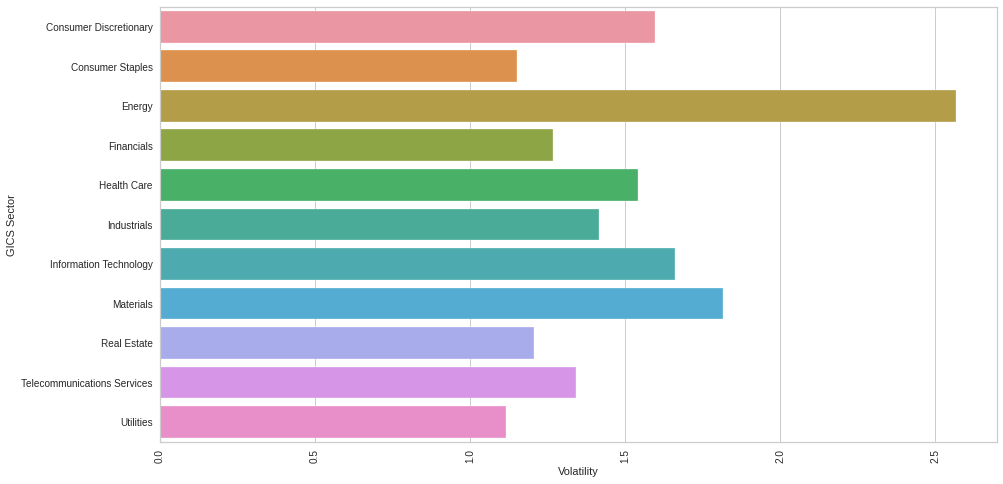

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='Volatility', y='GICS Sector', ci=False)  
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby('GICS Sector')['Volatility'].mean().sort_values(ascending=False)

GICS Sector
Energy                         2.568777
Materials                      1.816726
Information Technology         1.659801
Consumer Discretionary         1.595478
Health Care                    1.541023
Industrials                    1.416989
Telecommunications Services    1.341612
Financials                     1.267255
Real Estate                    1.206053
Consumer Staples               1.152675
Utilities                      1.118018
Name: Volatility, dtype: float64

* Energy sector has the highest volatility among all sectors.
* Utilties is the lowest one.

## Data Preprocessing

### Outlier Check

- Let's plot the boxplots of all numerical columns to check for outliers.

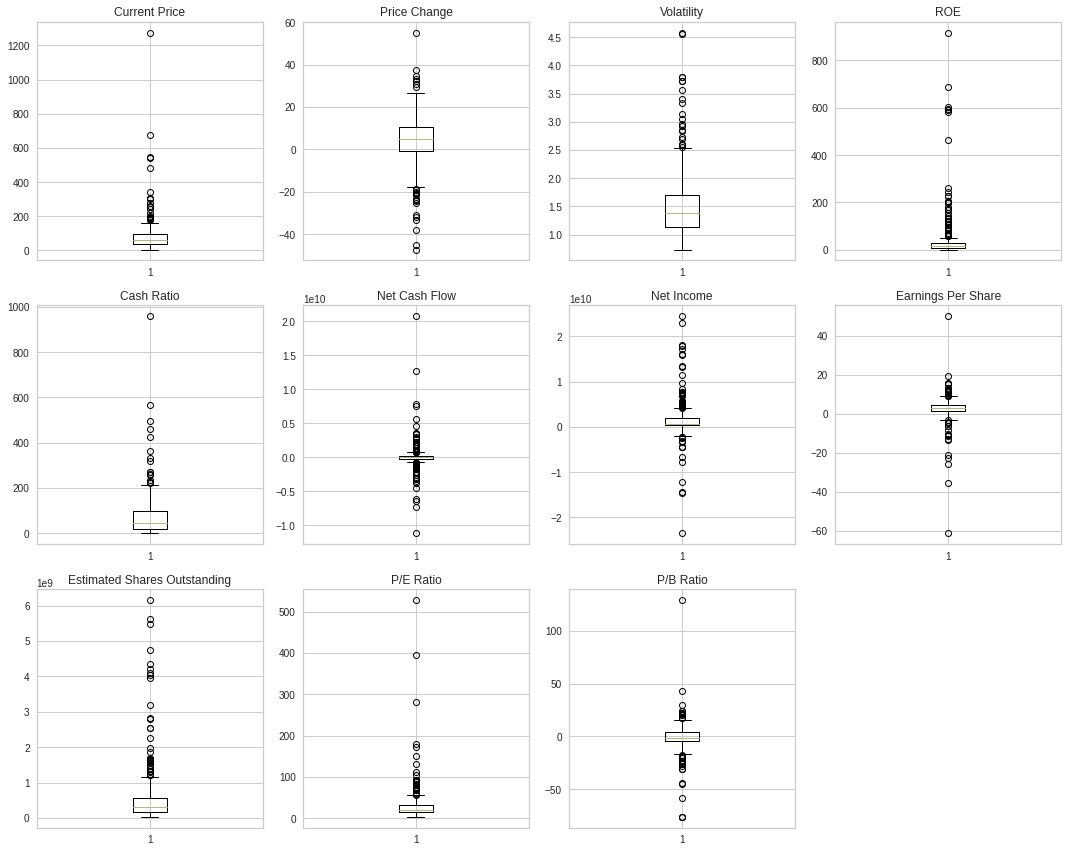

In [ ]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* We decide not to drop the outliers as it is rea values and dropping might impact the analysis significantly .

### Scaling

- Let's scale the data before we proceed with clustering.

In [ ]:
# scaling the data before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [ ]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

In [ ]:
#Displaying scaled data
subset_scaled_df.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


## K-means Clustering

### Checking Elbow Plot

In [ ]:
#Copying scaled dataset for further usage
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068


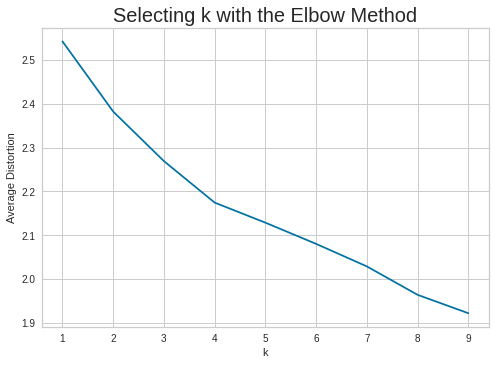

In [ ]:
# display average distortions for range of kmeans models fitted to scaled dataset
clusters = range(1, 10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

**From the Elbow method, it seems that 4 or 5 is a good value of k.**

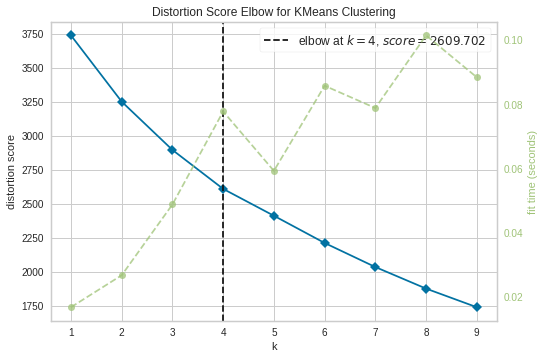

In [ ]:
#fit KMeans model and use visualizaer to indicate optimal K value
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 10), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

### Let's check the silhouette scores

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)


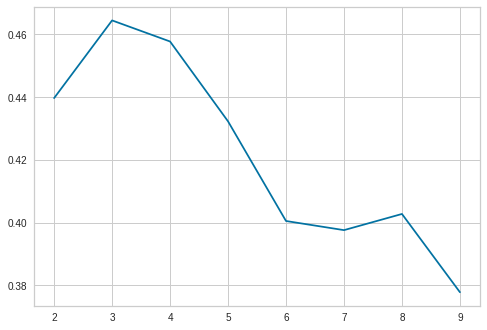

In [ ]:
#Fitting KMeans model and display silhouette scores for range of k clusters
sil_score = []
cluster_list = range(2, 10)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

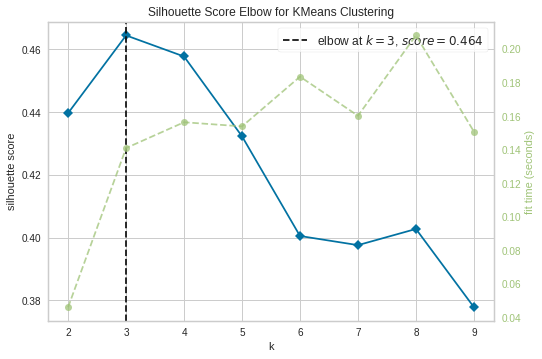

In [ ]:

#fit KMeans model and use visualizaer to indicate optimal K valuemodel = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 10), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

* From Silhouette score, 4 seems to be a good approximate for number of clusters

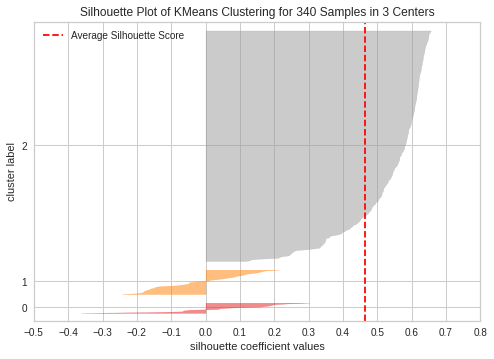

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))  
visualizer.fit(k_means_df)
visualizer.show()

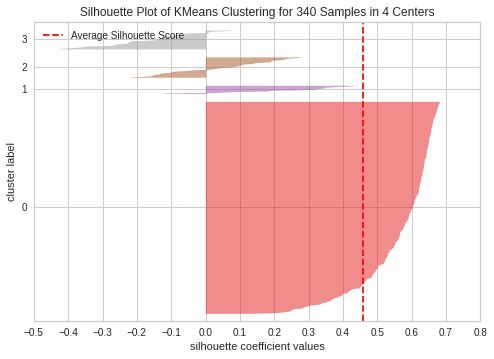

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))  
visualizer.fit(k_means_df)
visualizer.show()

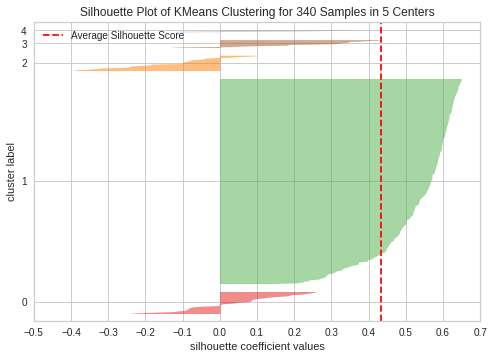

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))  
visualizer.fit(k_means_df)
visualizer.show()

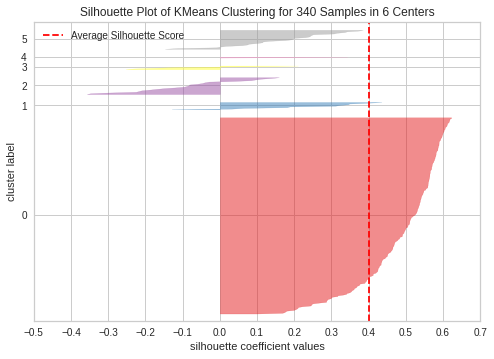

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))  
visualizer.fit(k_means_df)
visualizer.show()

### Creating Final Model

In [ ]:
# final K-means model, choosing K = 4 clusters
kmeans = KMeans(n_clusters=4, random_state=1)  
kmeans.fit(k_means_df)

KMeans(n_clusters=4, random_state=1)

In [ ]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
#k_means_df["KM_means_segments"] = kmeans.labels_
df1["KM_means_segments"] = kmeans.labels_

### Cluster Profiling

In [ ]:
km_cluster_profile = df1.groupby("KM_means_segments").mean()  

In [ ]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_means_segments")["Security"].count().values 
)

In [ ]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_means_segments,,,,,,,,,,,,
0,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277
1,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
2,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
3,234.170932,13.400685,1.729989,25.600000,277.640000,1554926560.000000,1572611680.000000,6.045200,578316318.948800,74.960824,14.402452,25


In [ ]:
## Complete the code to print the companies in each cluster
for cl in df1["KM_means_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_means_segments"] == cl]["Security"].unique().to_list())
    print()

In cluster 0, the following companies are present:
['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Adobe Systems Inc', 'Archer-Daniels-Midland Co', 'Ameren Corp', 'American Electric Power', 'AFLAC Inc', 'American International Group, Inc.', 'Apartment Investment & Mgmt', 'Assurant Inc', 'Arthur J. Gallagher & Co.', 'Akamai Technologies Inc', 'Albemarle Corp', 'Alaska Air Group Inc', 'Allstate Corp', 'Allegion', 'Applied Materials Inc', 'AMETEK Inc', 'Affiliated Managers Group Inc', 'Ameriprise Financial', 'American Tower Corp A', 'AutoNation Inc', 'Anthem Inc.', 'Aon plc', 'Amphenol Corp', 'Arconic Inc', 'Activision Blizzard', 'AvalonBay Communities, Inc.', 'Broadcom', 'American Water Works Company Inc', 'American Express Co', 'Boeing Company', 'Baxter International Inc.', 'BB&T Corporation', 'Bard (C.R.) Inc.', 'The Bank of New York Mellon Corp.', 'Ball Corp', 'Bristol-Myers Squibb', 'Boston Scientific', 'BorgWarner', 'Boston Properties', 'Caterpillar Inc.', 'Chubb Limit

In [ ]:
# Comparing cluster vs. GICS_Sector
pd.crosstab(df1["GICS Sector"], df1["KM_means_segments"]).style.highlight_max(color = 'lightgreen', axis = 0)

KM_means_segments,0,1,2,3
GICS Sector,,,,
Consumer Discretionary,33,1,0,6
Consumer Staples,17,1,0,1
Energy,6,1,22,1
Financials,45,3,0,1
Health Care,29,2,0,9
Industrials,52,0,1,0
Information Technology,24,1,3,5
Materials,19,0,1,0
Real Estate,26,0,0,1


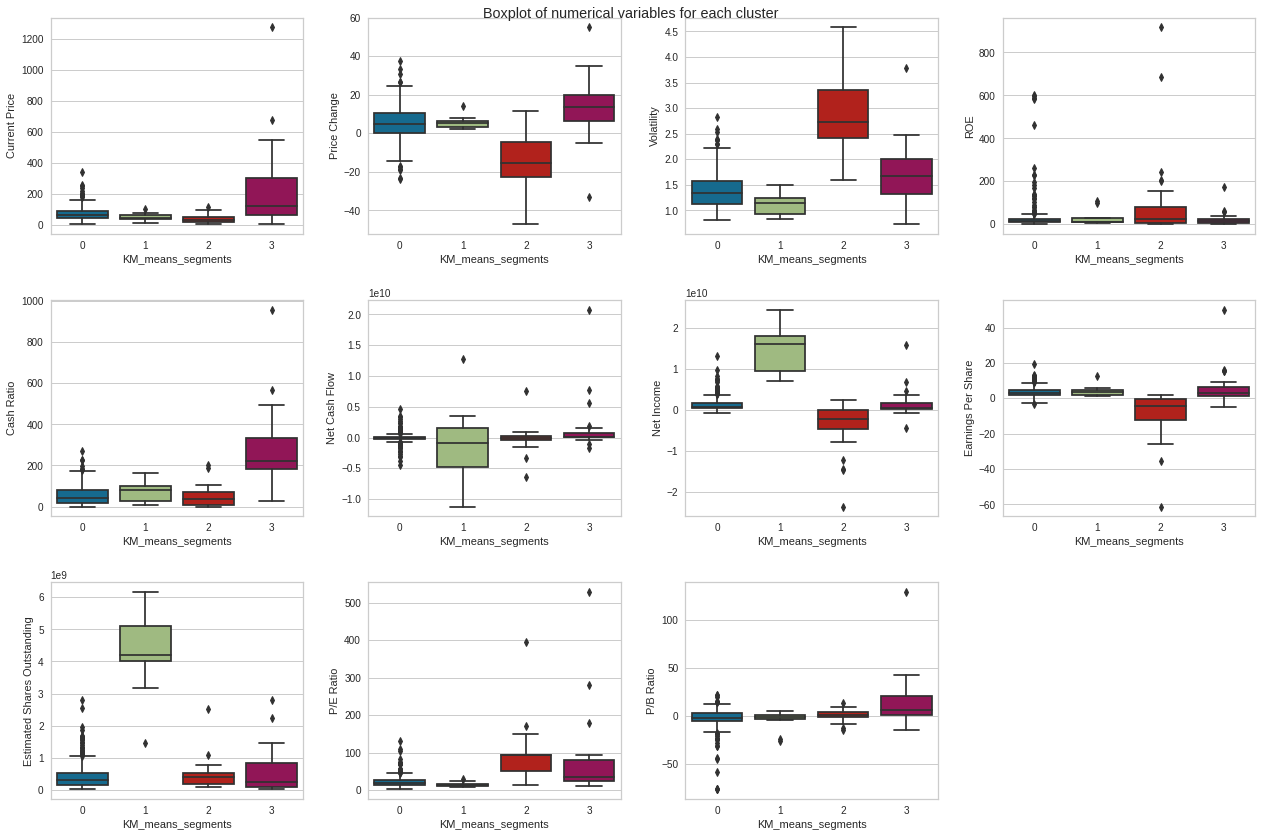

In [ ]:
plt.figure(figsize=(18, 12))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_means_segments", y=variable)

plt.tight_layout(pad=2.0)

### Insights

### Cluster 0 :
 * 277 stocks (~81.4% of total stocks) are there from all sectors but mostly consists of stocks from  Industrials, Financials & Consumer Discretionary sectors. This cluster has a well balanced stocks from throughout all sectors.   
* Companies within this cluster have:
     - Negative P/B ratios : which means negative book value (company's liabilities are more than its assets). If you use the price to book ratio, the lower the ratio the more undervalued the company is. This scenario could be true for new growing industries like IT.
     - Negative Net Cash flow : For new growing industries like IT which could mean that the company is investing in its future growth. But for well settled stable sectors it could mean that paying off long-term debt or making a dividend payment to shareholders.
     - Lower P/E Ratio : low P/E might indicate that the current stock price is low relative to earnings.**The lower the P/E ratio is, the better it is for both the business and potential investors.**
     - Current price, volatility, ROE, Cash Ratio, Net Income, EPS - all these attributes are moderate 


### Cluster 1:
* consists of 11 sectors  mostly from Finanace, Health care and Telecom.
* Companies within this cluster have:
     -  High ESO : it means a large number of shares are unrestricted and available for trading , — in other words , the stock is a very liquid one.
     -  High Net Income : this means these companies are efficient at converting sales into actual profit.
     -  Low P/E Ratio, P/B Ratio , Net Cash flow : shows that these companies might have negative book value , no much cash liquidity due to future investments or paying off debt.
     - Moderate current price, price change , volatility, ROE, EPS observed.

### Cluster 2:
* 27 stocks are there in cluster 2 and this clsuter is majorly consists of Energy sector stocks
* Companies in this cluster have: 
     - High volatility , ROE , P/E Ratio 
        * High volatility: Means that a security's value can change dramatically over a short period of time in either direction.
        * High P/E suggests that investors are expecting higher earnings growth in the future 
        * The higher the ROE (Return on equity), the better a company is at converting its equity financing into profits.  
     - Moderate ESO and P/B Ratio   
     - Low current price , price change, cash ratio , net cash flow, net income , EPS

### Cluster 3:

* 25 stocks belong to this cluster , mostly of stocks from the Health Care and Consumer Discretionary sectors
* Companies in this cluster have:
     - High Current Price
     - High Price Change
     - High Cash Ratio
     - High EPS 
     - High P/B Ratio
     - Moderate volatility , Net Income, ESO, PE Ratio
     - Low ROE





## Hierarchical Clustering

### Computing Cophenetic Correlation

In [ ]:
hc_df = subset_scaled_df.copy()

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

**Let's explore different linkage methods with Euclidean distance only.**

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm
        
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


**Let's view the dendrograms for the different linkage methods with Euclidean distance.**

### Checking Dendrograms

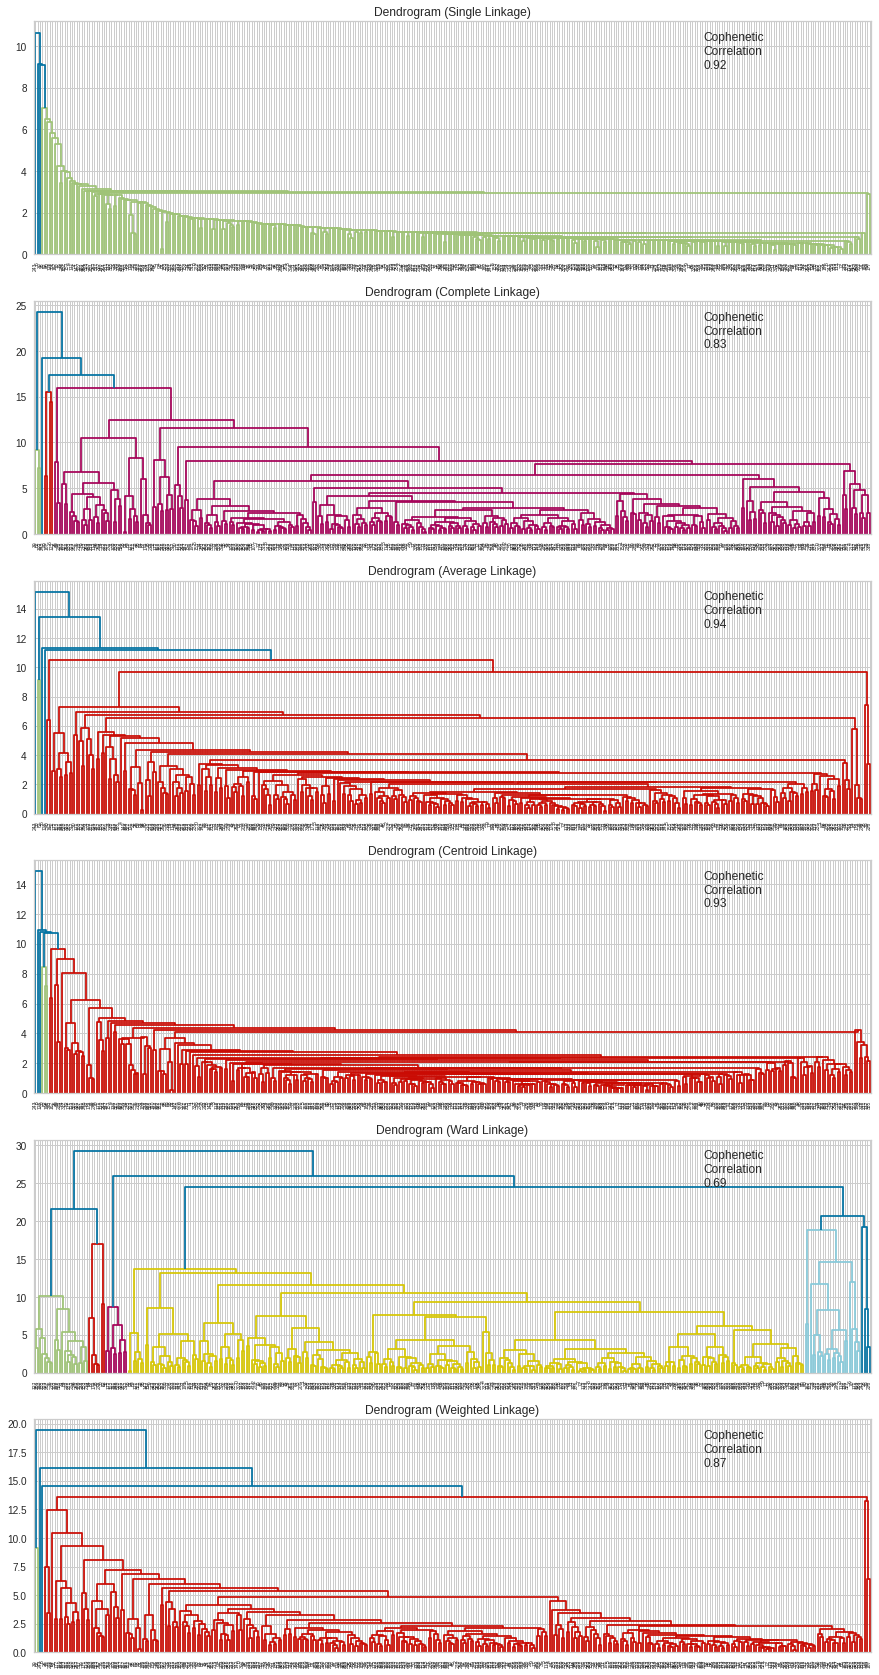

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [ ]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.710118
1,complete,0.787328
5,weighted,0.869378
0,single,0.923227
3,centroid,0.931401
2,average,0.942254


* Cophenetic correlation is highest with eucledian distance - average then with centroid linkages
* 6 seems to be the appropriate number of clusters from the above dendrogram for average linkage

### Creating model using sklearn

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='average') 
HCmodel.fit(hc_df)

AgglomerativeClustering(linkage='average', n_clusters=6)

In [ ]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [ ]:
hc_cluster_profile = df2.groupby("HC_segments").mean() 

In [ ]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values 
)

In [ ]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,77.287589,4.099730,1.518066,35.336336,66.900901,-33197321.321321,1538074666.666667,2.885270,560505037.293544,32.441706,-2.174921,333
1,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,2
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
3,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,1
4,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1
5,276.570007,6.189286,1.116976,30.000000,25.000000,90885000.000000,596541000.000000,8.910000,66951851.850000,31.040405,129.064585,1


* There are 2 clusters of two companies, 3 clusters of 1 company, and a single cluster of 333 companies.
* The clustering of these companies does not solve the business problem as the clusters do not have enough variability.
* Trying again with Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 4 appears to be the appropriate number of clusters from the dendrogram for Ward linkage

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(n_clusters=4)

In [ ]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df2["HC_Clusters"] = HCmodel.labels_

In [ ]:
cluster_profile = df2.groupby("HC_Clusters").mean()

In [ ]:
cluster_profile["count_in_each_segments"] = (
    df2.groupby("HC_Clusters")["Security"].count().values
)

In [ ]:
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,HC_segments,count_in_each_segments
HC_Clusters,,,,,,,,,,,,,
0,48.006208,-11.263107,2.590247,196.551724,40.275862,-495901724.137931,-3597244655.172414,-8.689655,486319827.294483,75.110924,-2.162622,0.137931,29
1,326.198218,10.563242,1.642560,14.400000,309.466667,288850666.666667,864498533.333333,7.785333,544900261.301333,113.095334,19.142151,0.533333,15
2,42.848182,6.270446,1.123547,22.727273,71.454545,558636363.636364,14631272727.272728,3.410000,4242572567.290909,15.242169,-4.924615,0.909091,11
3,72.760400,5.213307,1.427078,25.603509,60.392982,79951512.280702,1538594322.807018,3.655351,446472132.228456,24.722670,-2.647194,0.000000,285


In [ ]:
# let's see the names of the securities in each cluster
for cl in df2["HC_Clusters"].unique():
    print(
        "The",
        df2[df2["HC_Clusters"] == cl]["Security"].nunique(),
        "Securities in cluster",
        cl,
        "are:",
    )
    print(df2[df2["HC_Clusters"] == cl]["Security"].unique())
    print("-" * 100, "\n")

The 285 Securities in cluster 3 are:
['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Adobe Systems Inc', 'Analog Devices, Inc.', ..., 'Xylem Inc.', 'Yum! Brands Inc', 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis']
Length: 285
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ...,
                           'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']
---------------------------------------------------------------------------------------------------- 

The 15 Securities in cluster 1 are:
['Alliance Data Systems', 'Alexion Pharmaceuticals', 'Amgen Inc', 'Amazon.com Inc', 'Chipotle Mexican Grill', ..., 'Netflix Inc.', 'Priceline.com Inc', 'Regeneron', 'Waters Corporation', 'Yahoo Inc.']
Length: 15
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ...,
                           'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']
-----------------------------------------------

In [ ]:

pd.crosstab(df2["GICS Sector"], df2["HC_Clusters"]).style.highlight_max(color = 'lightgreen', axis = 0)

HC_Clusters,0,1,2,3
GICS Sector,,,,
Consumer Discretionary,1,3,1,35
Consumer Staples,2,1,1,15
Energy,22,0,1,7
Financials,1,0,4,44
Health Care,0,5,1,34
Industrials,1,0,0,52
Information Technology,1,4,1,27
Materials,1,0,0,19
Real Estate,0,1,0,26


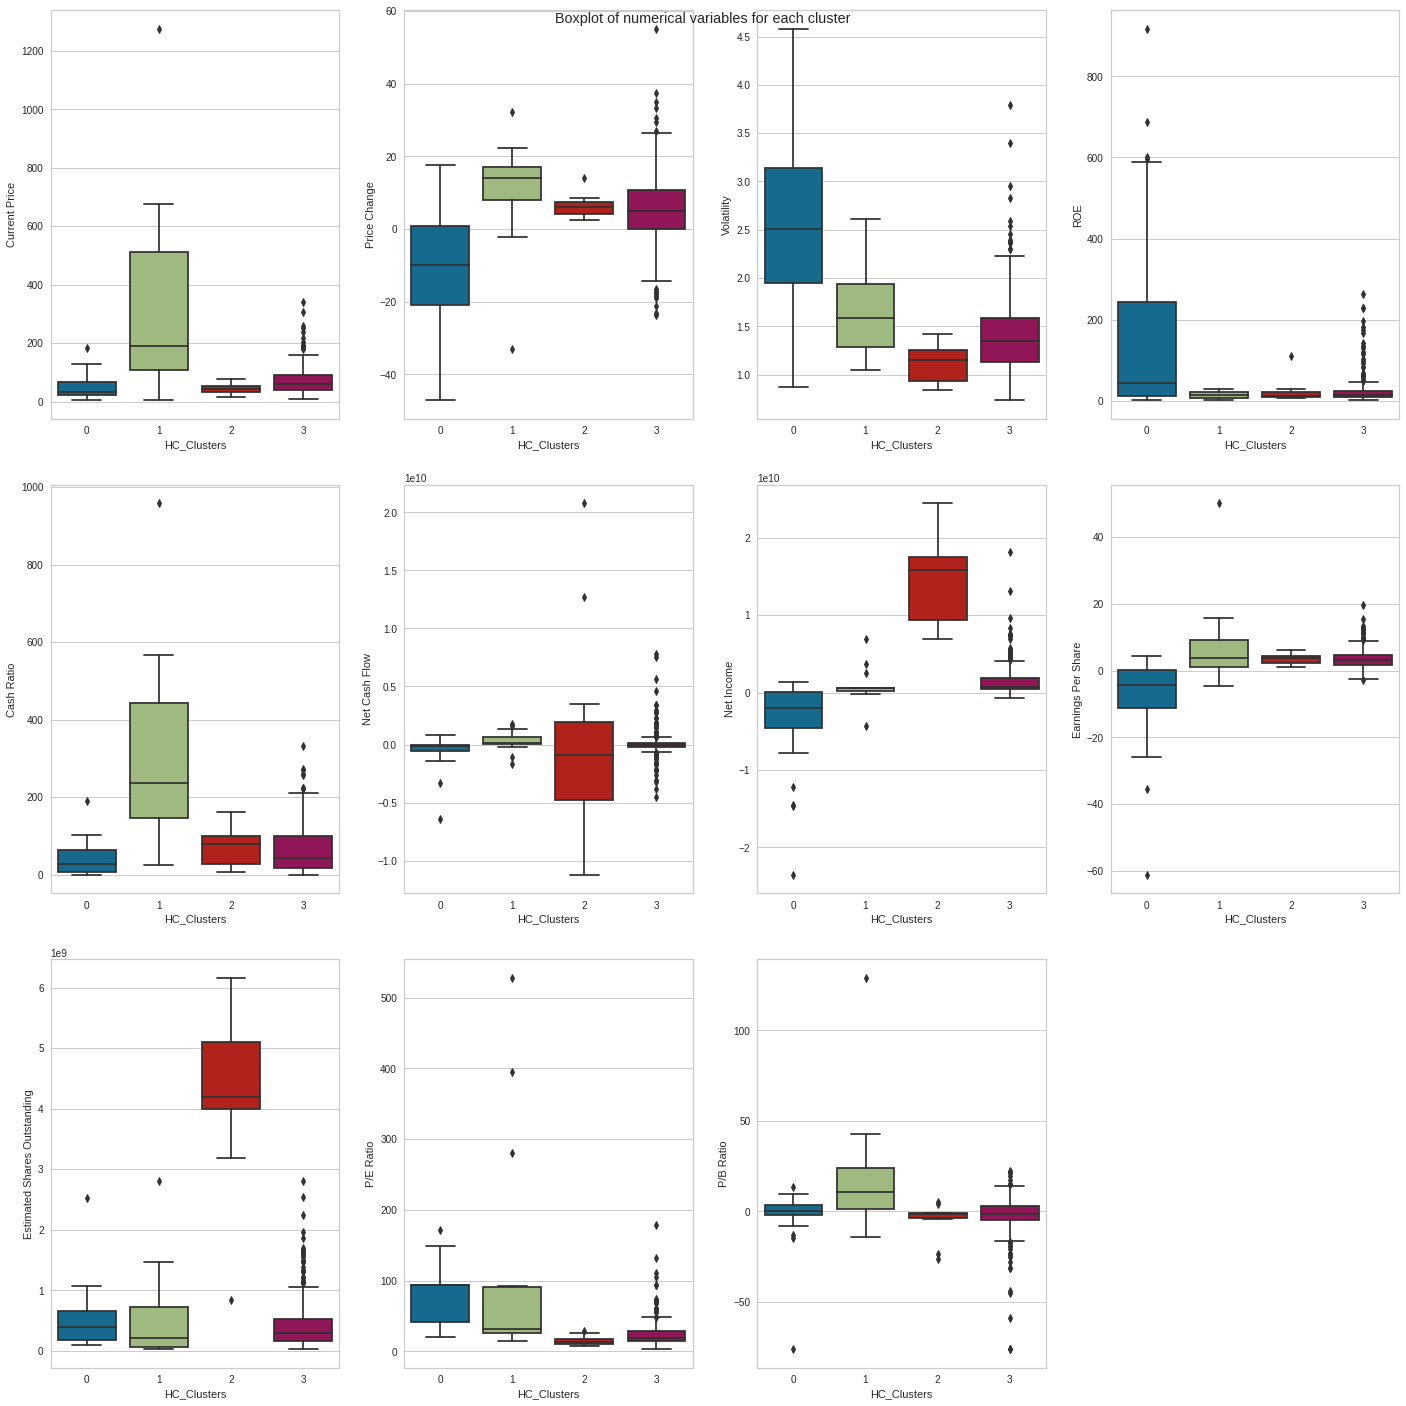

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

## Hierarchical Clustering Insights
We observe that the clusters obtained with Hierarchical clustering using Eucledian distance & Ward linkage is almost similar to the one obtained using K-Means clustering.

 - **Cluster 0** - majority of stocks are in the Energy sector Companies .Most of the most volatile stocks, especially those with outliers in price decreases. High negative net incomes and earnings per share

 -**Cluster 1** - Consists of health care and IT stocks with high price and high price change. High cash ratio and EPS.

- **Cluster 2** - High net cash flow and high net income. Most of the companies with the highest inflows and outflows of cash

- **Cluster 3** - 
285 stocks (~84% of all stocks in the dataset) drawn from all sectors present in the dataset. Low current price and low net income.

## K-means vs Hierarchical Clustering


**Which clustering technique took less time for execution?**
- Both KMeans model and the Agglomerative Clustering took less than 1 second to fit the model

**Which clustering technique gave you more distinct clusters, or are they the same?**
- Both clustering techniques gave almost similar clusters distributions where more than 80% of toal stocks and remaining stocks are distributed over 3 clusters.

**How many observations are there in the similar clusters of both algorithms?**
- KMean model cluster 0 with 277 stocks is similar to Agglomerative Clustering 3 with 285 stocks and having almost similar values for each attributes

- KMean model cluster 1 is similar to Agglomerative Clustering cluster 2 with 11 stocks in both.

- KMean model cluster 2 is almost same as cluster 0 of Agglomerative Clustering with 27 and 29 stocks respectively and holding almost same values in all attributes.

- KMean model cluster 3 is almost same as cluster 1 of Agglomerative Clustering with 25 and 15 stocks respectively. 

**How many clusters are obtained as the appropriate number of clusters from both algorithms?**
- Both algorithms resulted to 4 clusters with similar characteristics over the 11 attributes in the given dataset.

## Actionable Insights

From the above analysis and after comparing KMeans - Agglomerative Clustering model, we can derive below characteristics of each cluster group.
*Please note that the below clusters numbers are as per KMeans clusters groups* 

- **Cluster 0**: [Diversified and stable]

  This cluster is diversified and consists of more than **80% of the stocks** from all over sector.Stocks of this cluster are **under valued** means there is space for good growth and return.**Negetive cash flow** indicates investment or long term debt payment.**Low P/E** might indicate that the current stock price is low relative to earnings.
  
  *This cluster is moderately aggressive & safe investment option*

- **Cluster 1**: [High Cash flow and liquidity]

  This cluster has stocks from **11 sectors**  mostly from Finanace, Health care and Telecom. **High ESO & High Net Income** indicates that the stock is a very liquid one and  these companies are efficient at converting sales into actual profit.**Low P/E Ratio, P/B Ratio , Net Cash flow** indicate that these companies might have negative book value.
  
  *This is moderately aggressive & high performing cluster*


- **Cluster 2**: [High growth/return and Energy sector]

  This cluster is mainly consists of Energy sector stocks **High volatility** (stock's value can change abruptly) , **High P/E** suggests that investors are expecting higher earnings growth in the future. **High ROE (Return on equity)** shows that these companies are good at converting its equity financing into profits.
Low current price , price change, cash ratio , net cash flow, net income , EPS indicate that this cluster might consists of stocks from new companies which have good potential growth but not yet stable/bad past performance in the market.

  *This cluster is very aggressive but low performer*

- **Cluster 3** : [High Price and High Return]

  Mostly of stocks from the Health Care and Consumer Discretionary sectors. These stocks has **high price, high cash ratio** but at the same time high net income, EPS,PB Ratio but moderate volatility and net income. This would be a good choice for custmers who are willing to take risks for high return and high price.

  *This cluster is a very aggressive & high performing option*  


##Recommendations 
1. Based on the above analysis on charteristics of each cluster, Trade & Ahead should first analyze and identify the financial goals, investment preferences and risk tolerance of their clients. Then as per their need and preferences, they should recommend a cluster as a potential portfolio of stocks.

2. Stocks are segregated into 4 different clusters as per the criteria given above. Some are high risk-high return, some are moderate/low risk -moderate/low return. It is recommneded to suggest the client to split the stocks accross these 4 clusters in such a way that client's portfolio can obtain maximum earning in any market condition. A porfolio with good performance will help Trade & Ahead to retain old clients and to obtain new clients as well. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


___